# Yelp Multi-Label Classification 

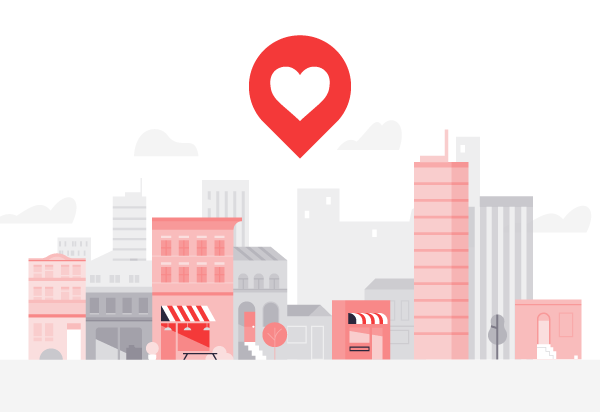

In this project, we're going to go up in difficulty and try to enter the [Yelp Kaggle competition](https://www.kaggle.com/c/yelp-restaurant-photo-classification/overview). Yelp would indeed like to see "the atmosphere of a restaurant" from a picture. We can predict the following labels on the image: 

* Good for lunch
* Good for dinner 
* Take reservations 
* Terrace available
* Restaurant is expensive or not
* Serves alcohol 
* Serves at Table 
* The atmosphere is classy 
* Good for the kids. 

Instead of making a classification of only one label (i.e. cat/dog), this time we will have to put several labels on the same picture. So let's see how we can solve this challenge with TensorFlow. 


## Table of Contents <a class="anchor" id="0"></a>

I.   [Import Data](#1)<br/>

II.  [Data Pre-processing for Yelp Restaurant Photo Classification](#2)<br/>

III.  [Model Architecture](#3)<br/>


# Import Data

* Start by installing : 
  * --upgrade tensorflow 
  * kaggle 

In [1]:
!pip install --upgrade tensorflow
!pip install kaggle

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc3)


* For the rest, we'll use the Kaggle API to download data (too large to do otherwise)
  * Go to the Kaggle API and see how to download your `kaggle.json` file: [Kaggle API](https://github.com/Kaggle/kaggle-api)
  * Next, you need to put your `kaggle.json` in the `/root` folder of your Google Colab (or your local machine). 
  * So try to do this using your terminal commands.
  * Here are some reminders 



  <img src="https://i.redd.it/rl0fe7r6zku11.jpg" alt="linux cmd" height=700>

We're going to use google colab for this notebook.

In [2]:
cd /root

/root


In [3]:
ls -al

total 64
drwx------ 1 root root 4096 Apr 18 17:47 ./
drwxr-xr-x 1 root root 4096 Apr 18 17:47 ../
-rw-r--r-- 1 root root 3106 Apr  9  2018 .bashrc
drwxr-xr-x 1 root root 4096 Apr 18 17:57 .cache/
drwxr-xr-x 1 root root 4096 Apr 16 16:10 .config/
drwxr-xr-x 3 root root 4096 Apr 15 16:11 .gsutil/
drwxr-xr-x 1 root root 4096 Apr 16 16:10 .ipython/
drwx------ 2 root root 4096 Apr 16 16:10 .jupyter/
drwxr-xr-x 2 root root 4096 Apr 18 17:47 .keras/
drwx------ 1 root root 4096 Apr 16 16:10 .local/
drwxr-xr-x 3 root root 4096 Apr 16 16:10 .node-gyp/
drwxr-xr-x 4 root root 4096 Apr 16 16:10 .npm/
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile


We're gonna reinstall kaggle because I don't see kaggle file.

In [4]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v


Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 3.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=2c28d26cc763ced2ad73b9fc9f7583d5ec1777a8c0d7fdd60dbde70d98e35655
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure

We use the kaggle API. We just download the kaggle.json file to access the API and move it to the Kaggle folder.

In [0]:
mv /kaggle.json /root/.kaggle/kaggle.json

In [0]:
#rm /root/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


* Use the command `!kaggle competitions download -p /content -c yelp-restaurant-photo-classification` to download all elements 

In [12]:
!kaggle competitions download -p /content -c yelp-restaurant-photo-classification

100% 13.2G/13.2G [03:48<00:00, 40.4MB/s]
100% 13.2G/13.2G [03:48<00:00, 61.9MB/s]


* Using the `!unzip` command, unzip the files into `.zip` format. 

In [13]:
cd /content

/content


In [14]:
ls

sample_data/  yelp-restaurant-photo-classification.zip


In [15]:
!unzip yelp-restaurant-photo-classification.zip

Archive:  yelp-restaurant-photo-classification.zip
  inflating: sample_submission.csv.tgz  
  inflating: test_photo_to_biz.csv.tgz  
  inflating: test_photos.tgz         
  inflating: train.csv.tgz           
  inflating: train_photo_to_biz_ids.csv.tgz  
  inflating: train_photos.tgz        


* We have to manage `.tgz` files. So use the `tarfile` library to be able to decompress them again. Here is a link to the documentation to help you: [Tarfile Documentation](https://www.journaldev.com/17946/python-tarfile-module)

In [0]:
import tarfile
file = tarfile.open("train_photos.tgz", mode="r:gz")
file.extractall()
file.close()

In [0]:
file = tarfile.open("train.csv.tgz", mode="r:gz")
file.extractall()
file.close()

In [0]:
file = tarfile.open("train_photo_to_biz_ids.csv.tgz", mode="r:gz")
file.extractall()
file.close()

# Data Pre-processing for Yelp Restaurant Photo Classification

In [21]:
# Import numpy and pandas
import numpy as np
import pandas as pd
%matplotlib inline

# Business id to labels
biz2labels = pd.read_csv('train.csv', header = 0, names = ['business','labels']).fillna('')

# Photo id to business id for the training dataset
photo2biz_train = pd.read_csv('train_photo_to_biz_ids.csv', header = 0, names = ['photo','business'])

# Get list of photo id 
photo_ids = np.array(photo2biz_train['photo'])

# Print number of photos
print('There are %d training images' % len(photo_ids))

There are 234842 training images


In [22]:
# Create a tuple for labels class
biz2labels['labels'] = biz2labels['labels'].apply(lambda x: tuple(sorted(int(t) for t in x.split())))
biz2labels.set_index('business', inplace=True)
biz2labels.head(n=10)

,labels
business,
1000,"(1, 2, 3, 4, 5, 6, 7)"
1001,"(0, 1, 6, 8)"
100,"(1, 2, 4, 5, 6, 7)"
1006,"(1, 2, 4, 5, 6)"
1010,"(0, 6, 8)"
101,"(1, 2, 3, 4, 5, 6)"
1011,"(2, 3, 5, 6)"
1012,"(1, 2, 3, 5, 6)"
1014,"(1, 2, 4, 5, 6)"


In [23]:
# Import
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing import image

# Define some functions
def encode_label(labels):
    target = np.zeros(9, dtype='int')
    for l in labels:
        target[l] = 1
    return target


def decode_label(x):
    return tuple(np.where(x == 1)[0])


def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)


def paths_to_tensor(img_paths):
    tensors = [path_to_tensor(img_path) for img_path in tqdm.tqdm(img_paths)]
    return np.vstack(tensors)


def paths_to_tensor_nobar(img_paths):
    tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(tensors)


def load_dataset(file):
    data = np.load(file)
    images = data['img']
    targets = data['target']
    return images, targets


def history(model):
    plt.figure(figsize = (15, 5) )

    plt.subplot(121)
    plt.plot(model.history['loss'], color='blue', label='train')
    plt.plot(model.history['val_loss'], color='red', label='valid')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss Function')

    plt.subplot(122)
    plt.plot(model.history['accuracy'], color = 'blue', label='train')
    plt.plot(model.history['val_accuracy'], color='red', label='valid')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')


def true_pos(y_true, y_pred):
    return np.sum(y_true * y_pred)


def false_pos(y_true, y_pred):
    return np.sum(y_true * (1. - y_pred))


def false_neg(y_true, y_pred):
    return np.sum((1. - y_true) * y_pred)


def precision(y_true, y_pred):
    return true_pos(y_true, y_pred) / (true_pos(y_true, y_pred) + false_pos(y_true, y_pred))


def recall(y_true, y_pred):
    return true_pos(y_true, y_pred) / (true_pos(y_true, y_pred) + false_neg(y_true, y_pred))


def f1_score(y_true, y_pred):
    return 2. / (1. / recall(y_true, y_pred) + 1. / precision(y_true, y_pred))

Using TensorFlow backend.


In [24]:
# Join labels sequence of arrays along a new axis and apply encode_label
photo_targets = np.vstack(biz2labels.loc[photo2biz_train['business']]['labels'].apply(encode_label))
print('Number of rows: %d - Number of columns: %d' % (photo_targets.shape[0], photo_targets.shape[1]))

Number of rows: 234842 - Number of columns: 9


In [25]:
# Make a train and a test split
from sklearn.model_selection import train_test_split

train_files, test_files, train_targets, test_targets = train_test_split(photo_ids,
                                                                        photo_targets,
                                                                        test_size=0.25,
                                                                        random_state=7)

valid_files, valid_targets = (test_files[:int(len(test_files)/2)], test_targets[:int(len(test_files)/2)])
test_files, test_targets = (test_files[int(len(test_files)/2):], test_targets[int(len(test_files)/2):])

print('There are %d images in the training dataset' % len(train_files))
print('There are %d images in the validation dataset' % len(valid_files))
print('There are %d images in the test dataset' % len(test_files))

There are 176131 images in the training dataset
There are 29355 images in the validation dataset
There are 29356 images in the test dataset


In [0]:
# Save several arrays into a single file in uncompressed .npz format
np.savez('train.npz', img=train_files, target=train_targets)
np.savez('valid.npz', img=valid_files, target=valid_targets)
np.savez('test.npz', img=test_files, target=test_targets)

# Model Architecture

In [28]:
# Load dataset
train_ids, train_targets = load_dataset('train.npz')
valid_ids, valid_targets = load_dataset('valid.npz')
test_ids, test_targets = load_dataset('test.npz')

train_files = np.array(['/content/train_photos/' + str(i) + '.jpg' for i in train_ids])
valid_files = np.array(['/content/train_photos/' + str(i) + '.jpg' for i in valid_ids])
test_files = np.array(['/content/train_photos/' + str(i) + '.jpg' for i in test_ids])

print('There are %d images in the training dataset' % len(train_files))
print('There are %d images in the validation dataset' % len(valid_files))
print('There are %d images in the test dataset' % len(test_files))

There are 176131 images in the training dataset
There are 29355 images in the validation dataset
There are 29356 images in the test dataset


In [0]:
# Sample data
nb_train, nb_valid, nb_test = (10000,1000,1000)

In [30]:
# Preprocess resnet50
from keras.applications.resnet50 import preprocess_input

train_tensors = preprocess_input(paths_to_tensor(train_files[:nb_train]))
valid_tensors = preprocess_input(paths_to_tensor(valid_files[:nb_valid]))
test_tensors = preprocess_input(paths_to_tensor(test_files[:nb_test]))

100%|██████████| 1000/1000 [00:05<00:00, 192.41it/s]


In [0]:
# Import tensorflow
from keras.applications.resnet50 import ResNet50
import tensorflow as tf

In [32]:
# Model resnet50

model = ResNet50(include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
# Predict
train_resnet50 = model.predict(train_tensors)
valid_resnet50 = model.predict(valid_tensors)
test_resnet50  = model.predict(test_tensors)

In [0]:
# Save
np.savez('yelp_resnet50.npz', 
         train_features=train_resnet50, train_targets=train_targets[:nb_train],
         valid_features=valid_resnet50, valid_targets=valid_targets[:nb_valid],
         test_features=test_resnet50, test_targets=test_targets[:nb_test])

# Addition of the supervision layer

In [0]:
bottleneck_features = np.load('yelp_resnet50.npz')
train_resnet50 = bottleneck_features['train_features']
valid_resnet50 = bottleneck_features['valid_features']
test_resnet50 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [36]:
train_resnet50.shape[1:]

(7, 7, 2048)

In [37]:
# Addition of the supervision layer
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

resnet50 = Sequential()
resnet50.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))
resnet50.add(Dense(9, activation='sigmoid'))

resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile and optimizer
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
resnet50.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
# Fit 
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='weights_compare_resnet50.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_resnet50 = resnet50.fit(train_resnet50, train_targets, 
                                validation_data=(valid_resnet50,valid_targets), 
                                epochs=1000, batch_size=64, verbose=0,
                                callbacks=[checkpointer,checkimprovement])

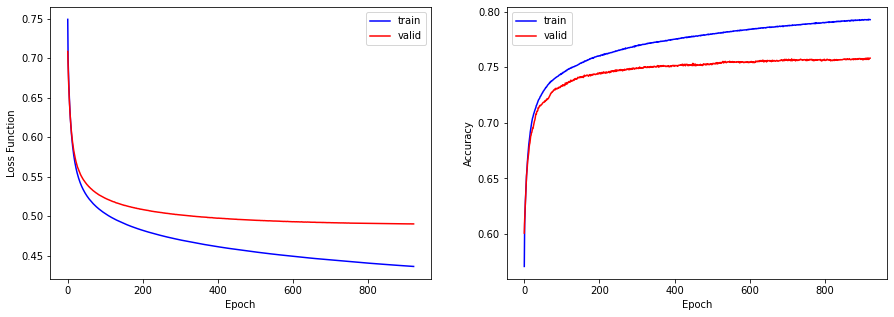

In [40]:
history(history_resnet50)

In [0]:
resnet50.load_weights('weights_compare_resnet50.hdf5')

In [42]:
test_resnet50.shape

(1000, 7, 7, 2048)

In [43]:
# F1-score
resnet50_predictions = (resnet50.predict(test_resnet50) >= 0.5).astype(int)
resnet50_score = f1_score(test_targets, resnet50_predictions)
print('F1 score: %.5f' % resnet50_score)

F1 score: 0.76108
